## Inputs

In [ ]:
#typical libraries
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow import keras


In [ ]:
from keras.datasets import cifar10 #to load the data
from keras.utils import np_utils #for the encoding to transform the labels in categorical
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D #import the layers
from keras.models import Sequential #import the model
from tensorflow.keras import optimizers #import the optimizer
from keras.callbacks import Callback #import the callback
from keras.preprocessing import image
from keras import backend as K 

## Loading and Preparing the data

In [ ]:
#tloading the data to x1 and x2
(x1, _), (x2,_) = cifar10.load_data()

In [ ]:
#divining the data into training 80%, test 10% and validation 10%

x = np.vstack((x1,x2))
x = x / 255
(x_train,x_val,x_test) = np.vsplit(x,np.array([48000,54000]))
assert x_train.shape == (48000,32,32,3)
assert x_val.shape == (6000,32,32,3)
assert x_test.shape == (6000,32,32,3)

In [ ]:
#visualisation of the data

def show_data(X , n =10, title=""):
  plt.figure(figsize=(15,5))
  for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(image.array_to_img(X[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.suptitle(title, fontsize = 20)

In [ ]:
#printing the size
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
#images of 32x32 pixels and 3 RGB channels

(48000, 32, 32, 3)
(6000, 32, 32, 3)
(6000, 32, 32, 3)


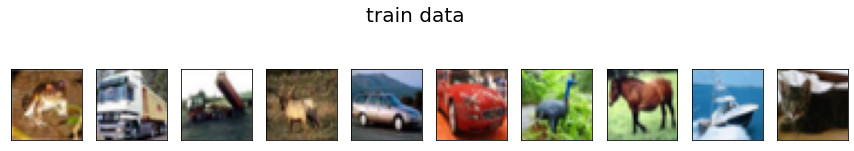

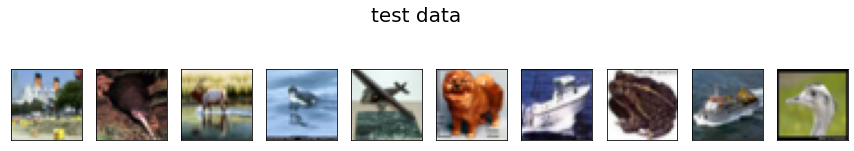

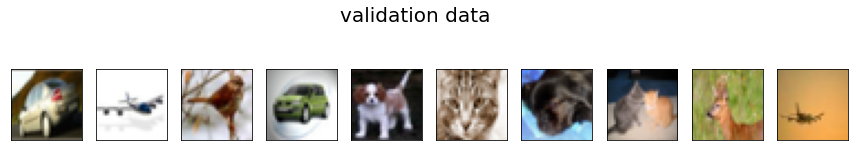

In [ ]:
#checking how the images look like, setting our test train and validation data
show_data(x_train, title = 'train data')
show_data(x_test, title = 'test data')
show_data(x_val, title = 'validation data')

#Neural Network Model

With the sequential model we are going to add layer after layer and then evaluate them in a sequential way. 
The architect  we are using is:

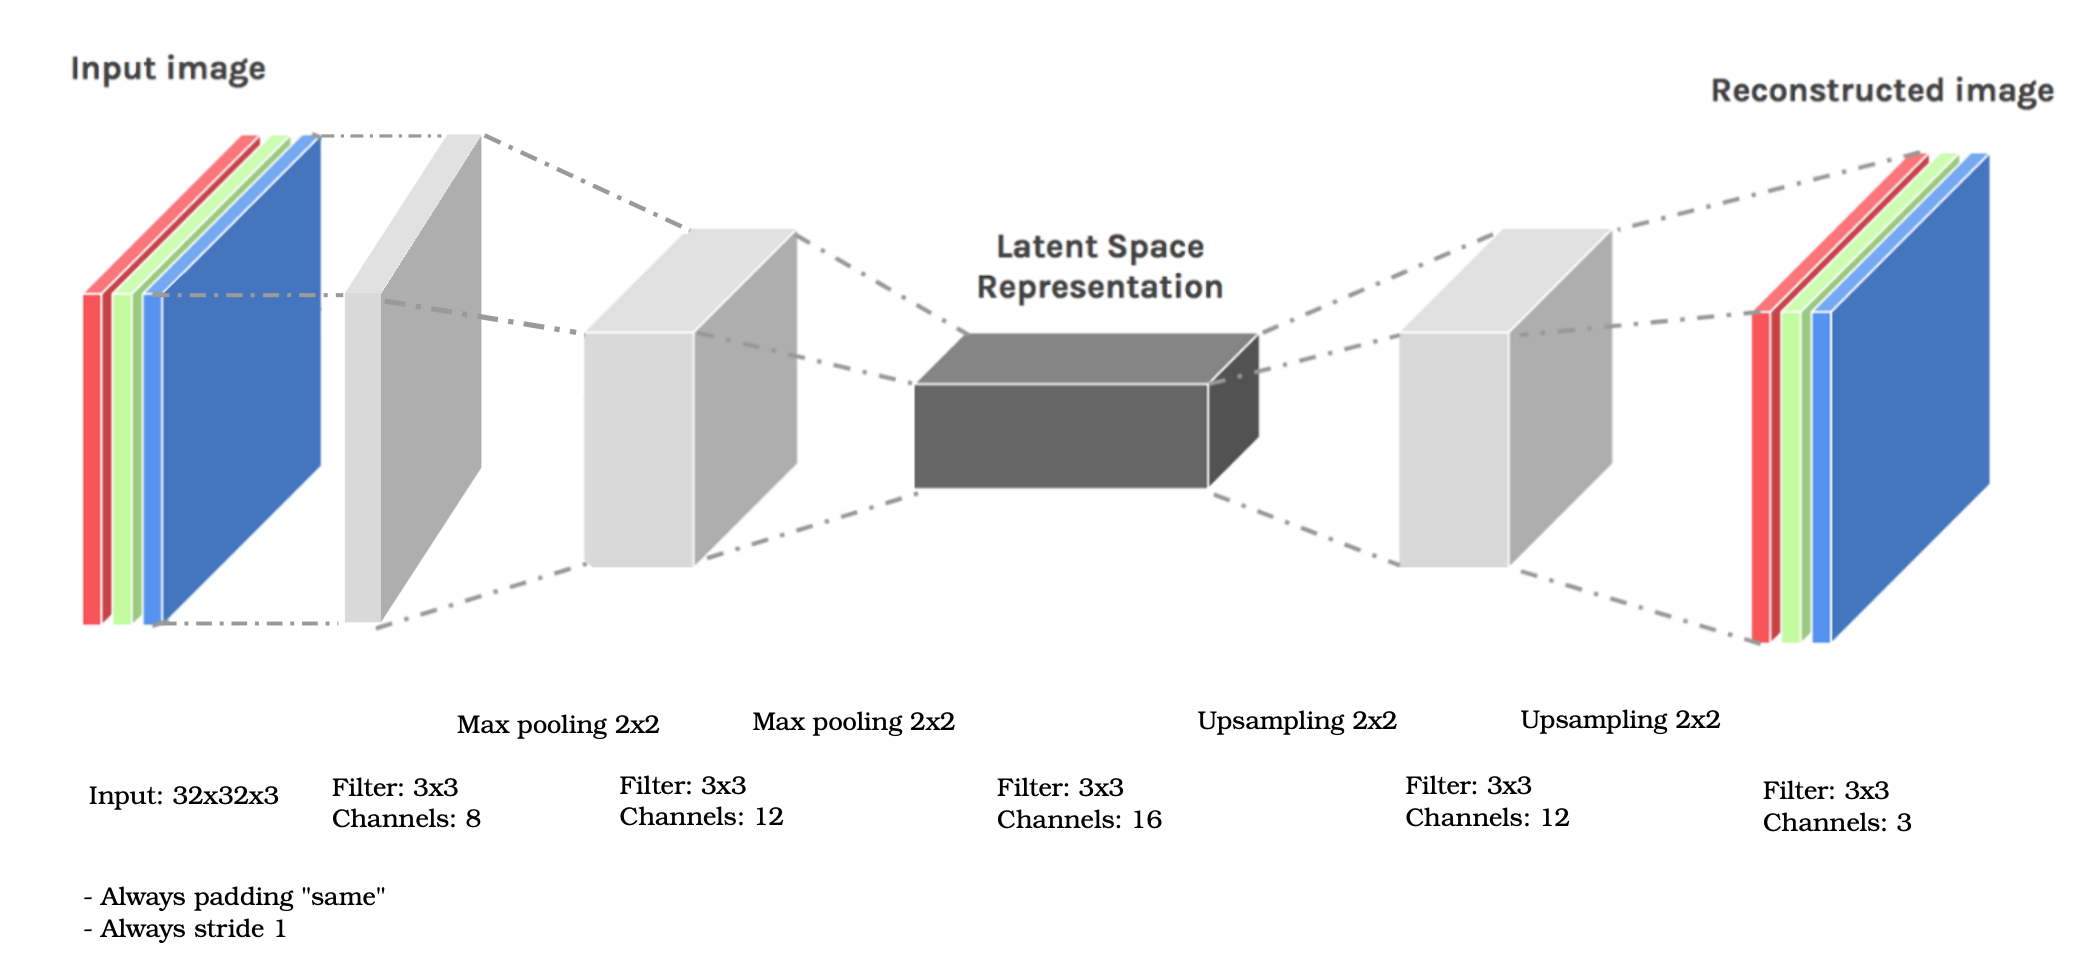

In [ ]:
#the input images
input_shape = (32,32,3)

In [ ]:
#using sequential model 
encoder = Sequential([
          #using  ReLU as activation function
          Conv2D(8, kernel_size=(3,3), padding = 'same',  activation = 'relu'),
          MaxPooling2D(pool_size =2),
          Conv2D(12, kernel_size=(3,3), padding = 'same', activation = 'relu'),
          MaxPooling2D(pool_size =2),
          Conv2D(16, kernel_size=(3,3), padding = 'same',  activation = 'relu')
    ])

decoder = Sequential([
          UpSampling2D(size =(2,2)),
          Conv2D(12, kernel_size=(3,3), padding = 'same',  activation = 'relu'),
          UpSampling2D(size =(2,2)),
          Conv2D(3, kernel_size=(3,3), padding = 'same', activation = 'sigmoid')
    ])


Parameters we want for the compile:
*  the Adam optimizer
*  loss to use the binary_crossentropy
*  the accuracy as a metric to check how thing are going



In [ ]:
#clear season to put everything out of memory
K.clear_session()
#creating the model
model = Sequential([encoder,decoder])
#model = createModel()
#defining the optimizer Adam
AdamOpt = keras.optimizers.Adam(learning_rate=0.01)
#compile the model
model.compile(optimizer = AdamOpt, loss = 'binary_crossentropy',metrics= ['accuracy'])

#Custome Call Back class for logging 

Every time an epoch ends this function runs and prints the results.

We are printing the results of every one epoch to see 
*  In what epoch we are
*  What is the loss
*  What is the loss evaluated on the validation dataset
*  The accuracy reached on the training dataset
*  The accuracy reached on the validation dataset
Printing both accuracies helps as compare them to make sure we are not overfitting.
All the Information can be found in the logs dictionary 



In [ ]:
class CustomCallback(Callback):
  #function the prints out the output that we want 
  def on_epoch_end(self, epoch, logs={}):
    #after every five epochs
    if (epoch % 50 == 0):
      print()
      print("Epoch: ", epoch)
      print()
      print("Loss: ", logs.get('loss'))
      print("validation Loss: ", logs.get('val_loss'))
      print("Accuracy training: ", logs.get('accuracy'))
      print("Accuracy validation: ", logs.get('val_mse'))
      return

# Training of the network

In the model fit were we give data for:
*   training x,y our dataset
*   the batch size
*   how many epochs
*   With verbose=0, making sure we dont want any debugging outputs, because we have provided our own class do that. Otherwise for every epoch it will print out some debugging Information that slow down everything because of a lot input and output 
*  the validation data set because we want to make sure that we are not over fitting







In [ ]:
#defining the bach size and the epochs
batch_size = 256
epochs = 250

#initiate the class
CC = CustomCallback()

#model fit were we give the training x 
history = model.fit(x_train, x_train, batch_size = batch_size, epochs = epochs, verbose =0, validation_data = (x_val, x_val),callbacks = [CC])


Epoch:  0

Loss:  0.5912409424781799
validation Loss:  0.5776616334915161
Accuracy training:  0.4336288273334503
Accuracy validation:  None

Epoch:  50

Loss:  0.5588045716285706
validation Loss:  0.5605399012565613
Accuracy training:  0.763966977596283
Accuracy validation:  None

Epoch:  100

Loss:  0.558232843875885
validation Loss:  0.5585649013519287
Accuracy training:  0.7665302753448486
Accuracy validation:  None

Epoch:  150

Loss:  0.5576393008232117
validation Loss:  0.5587695837020874
Accuracy training:  0.764270007610321
Accuracy validation:  None

Epoch:  200

Loss:  0.5576884746551514
validation Loss:  0.558341383934021
Accuracy training:  0.7621047496795654
Accuracy validation:  None


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 8, 8, 16)          2844      
_________________________________________________________________
sequential_1 (Sequential)    (None, 32, 32, 3)         2067      
Total params: 4,911
Trainable params: 4,911
Non-trainable params: 0
_________________________________________________________________


Above, in the output shape we can see the output of each layer. Both of the layers will give us a multi-dimensional tensor as output. The 'None' dimension is just a place to put the number of observation that we will use so we can evaluate the computational graph for different number of observations, like the development of a training or for test dataset. In 'Total params' we can see the number of learnable parameters and having a bigger number gives us more flexibility to get a nice Accuracy.

# Plots

Text(0, 0.5, 'Accuracy')

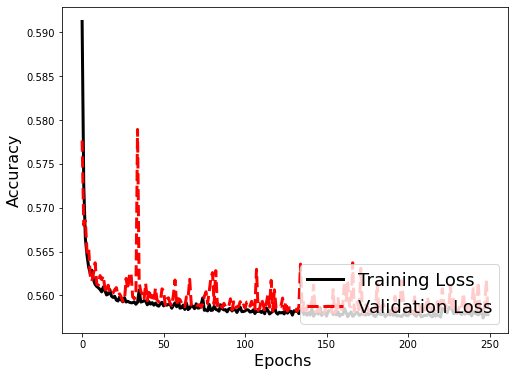

In [ ]:
#printing the loss Function
plt.figure(figsize=[8,6])

plt.plot (history.history['loss'],'black', linewidth=3.0)
plt.plot (history.history['val_loss'],'red', ls= '--' ,linewidth=3.0)
plt.legend(['Training Loss','Validation Loss'],fontsize =18,loc ='lower right')

plt.xlabel('Epochs ', fontsize =16)
plt.ylabel ('Accuracy', fontsize =16)

Text(0, 0.5, 'Accuracy')

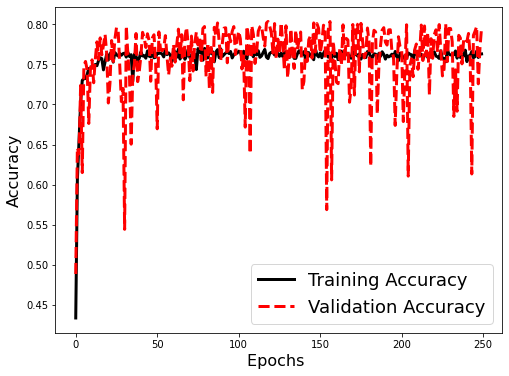

In [ ]:
#printing the Accuracy Function
plt.figure(figsize=[8,6])

plt.plot (history.history['accuracy'],'black', linewidth=3.0)
plt.plot (history.history['val_accuracy'],'red', ls= '--' ,linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize =18,loc ='lower right')

plt.xlabel('Epochs ', fontsize =16)
plt.ylabel ('Accuracy', fontsize =16)

# Visualize the results

In [ ]:
decoded_data = model.predict(x_train)

In [ ]:
#encoded_data =

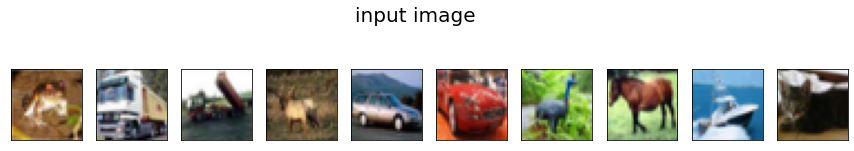

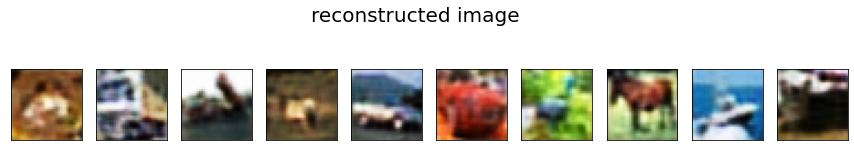

In [ ]:
show_data(x_train, title = 'input image')
#show_data(encoded_data, title = 'encoded data')
show_data(decoded_data, title = 'reconstructed image')


using sigmoid as activation function in the output: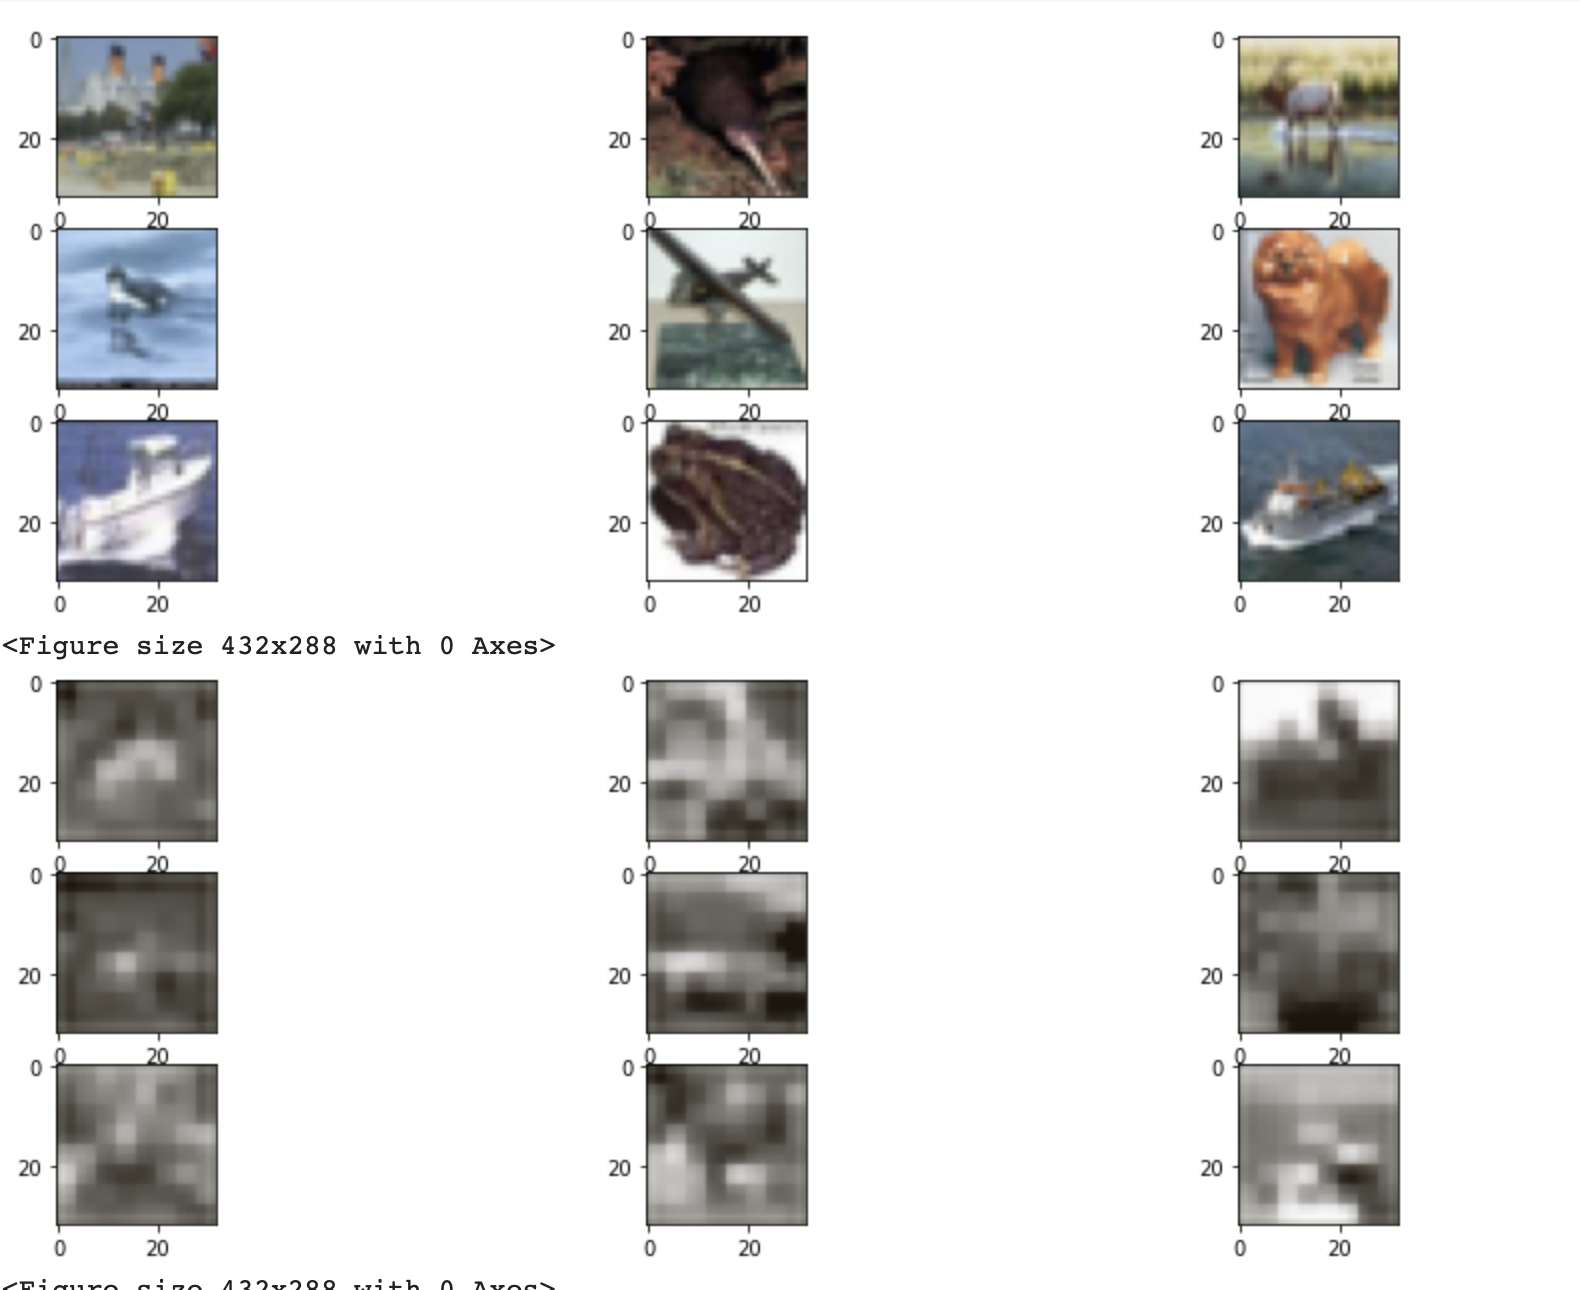